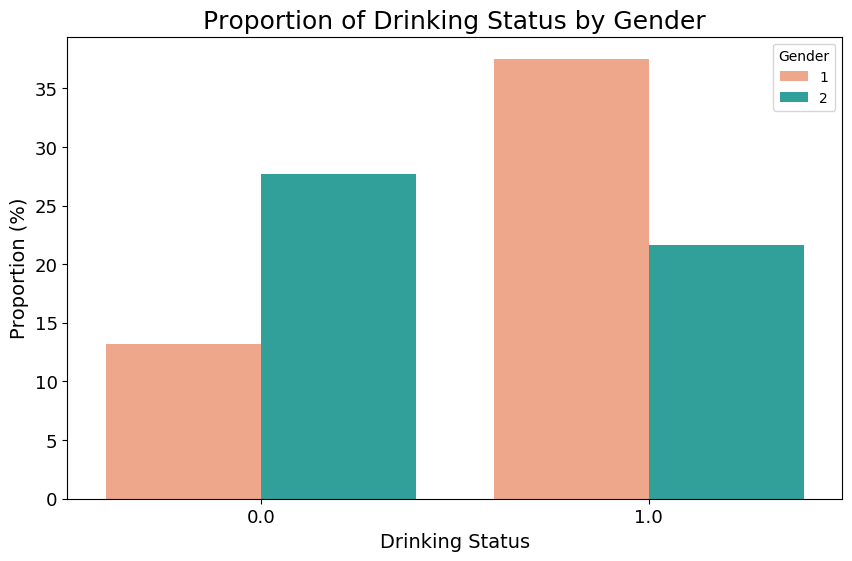

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 불러오기
df = pd.read_csv(r'C:\Users\s-joe\Downloads\df.csv')

# Grouping by '성별' and '음주여부', counting the occurrences, and calculating proportions
df_summary = (df.groupby(['성별', '음주여부'])
                .size()
                .reset_index(name='음주')
                .query('음주여부 == 음주여부')  # Equivalent to removing NA values
                .assign(비율=lambda x: x['음주']/len(df)*100)
                .drop(columns='음주'))

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='음주여부', y='비율', hue='성별', data=df_summary, palette=['#FFA07A', '#20B2AA'])
barplot.set_title('Proportion of Drinking Status by Gender', fontsize=18)
barplot.set_xlabel('Drinking Status', fontsize=14)
barplot.set_ylabel('Proportion (%)', fontsize=14)
barplot.tick_params(labelsize=13)
plt.legend(title='Gender')
plt.show()